

**AISHWARYA S
  22MCB0006 
  09/june/2023 **




In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/Sentiment_data.csv') 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Text vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Transform the word counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)

print("Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))

# SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)

print("SVM Classifier:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_tfidf, y_train)
dt_predictions = dt_classifier.predict(X_test_tfidf)

print("Decision Tree Classifier:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))


Naive Bayes Classifier:
              precision    recall  f1-score   support

       anger       0.64      0.44      0.52       156
        fear       0.54      0.73      0.62       164
         joy       0.88      0.54      0.67       144
         sad       0.63      0.82      0.71       154

    accuracy                           0.63       618
   macro avg       0.67      0.63      0.63       618
weighted avg       0.67      0.63      0.63       618

Accuracy: 0.6343042071197411
SVM Classifier:
              precision    recall  f1-score   support

       anger       0.60      0.54      0.57       156
        fear       0.61      0.63      0.62       164
         joy       0.72      0.75      0.73       144
         sad       0.76      0.77      0.76       154

    accuracy                           0.67       618
   macro avg       0.67      0.67      0.67       618
weighted avg       0.67      0.67      0.67       618

Accuracy: 0.6699029126213593
Decision Tree Classifier:
      

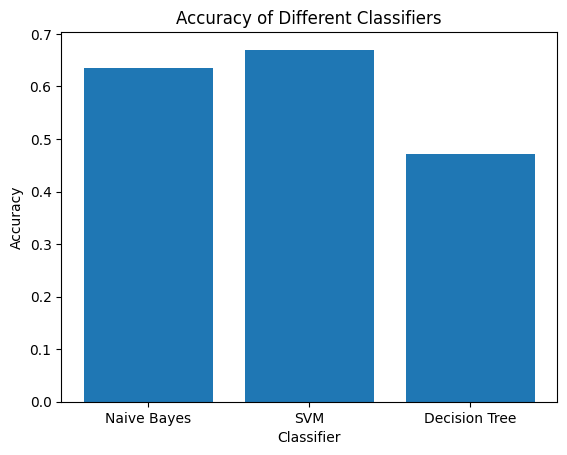

In [86]:
import matplotlib.pyplot as plt

classifiers = ['Naive Bayes', 'SVM', 'Decision Tree']
accuracies = [accuracy_score(y_test, nb_predictions), accuracy_score(y_test, svm_predictions), accuracy_score(y_test, dt_predictions)]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()

In [10]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
! pip install keras.preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from gensim.models import Word2Vec, FastText

# Load the dataset
data = pd.read_csv('/content/train.csv')  

# Convert labels to the appropriate data type
data['label'] = data['label'].astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['label'], test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure consistent length
max_sequence_length = max([len(sequence) for sequence in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Word Embedding - Word2Vec
word2vec_model = Word2Vec(sentences=X_train_sequences, vector_size=100, min_count=1)
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv.key_to_index:
        embedding_matrix[i] = word2vec_model.wv[word]

# Word Embedding - FastText
fasttext_model = FastText(sentences=X_train_sequences, vector_size=100, min_count=1)
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in fasttext_model.wv.key_to_index:
        embedding_matrix[i] = fasttext_model.wv[word]

# Define the BI-LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train.astype(float), validation_data=(X_test_padded, y_test.astype(float)), epochs=10, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test.astype(float), verbose=0)
print("Accuracy:", accuracy)

Epoch 1/10
400/400 [==============================] - 65s 153ms/step - loss: 0.2673 - accuracy: 0.9301 - val_loss: 0.2575 - val_accuracy: 0.9287
Epoch 2/10
400/400 [==============================] - 51s 127ms/step - loss: 0.2543 - accuracy: 0.9301 - val_loss: 0.2572 - val_accuracy: 0.9287
Epoch 3/10
400/400 [==============================] - 65s 162ms/step - loss: 0.2539 - accuracy: 0.9301 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 4/10
400/400 [==============================] - 47s 118ms/step - loss: 0.2539 - accuracy: 0.9301 - val_loss: 0.2579 - val_accuracy: 0.9287
Epoch 5/10
400/400 [==============================] - 49s 123ms/step - loss: 0.2539 - accuracy: 0.9301 - val_loss: 0.2575 - val_accuracy: 0.9287
Epoch 6/10
400/400 [==============================] - 49s 121ms/step - loss: 0.2539 - accuracy: 0.9301 - val_loss: 0.2586 - val_accuracy: 0.9287
Epoch 7/10
400/400 [==============================] - 51s 128ms/step - loss: 0.2537 - accuracy: 0.9301 - val_loss: 0.2575 - val_ac

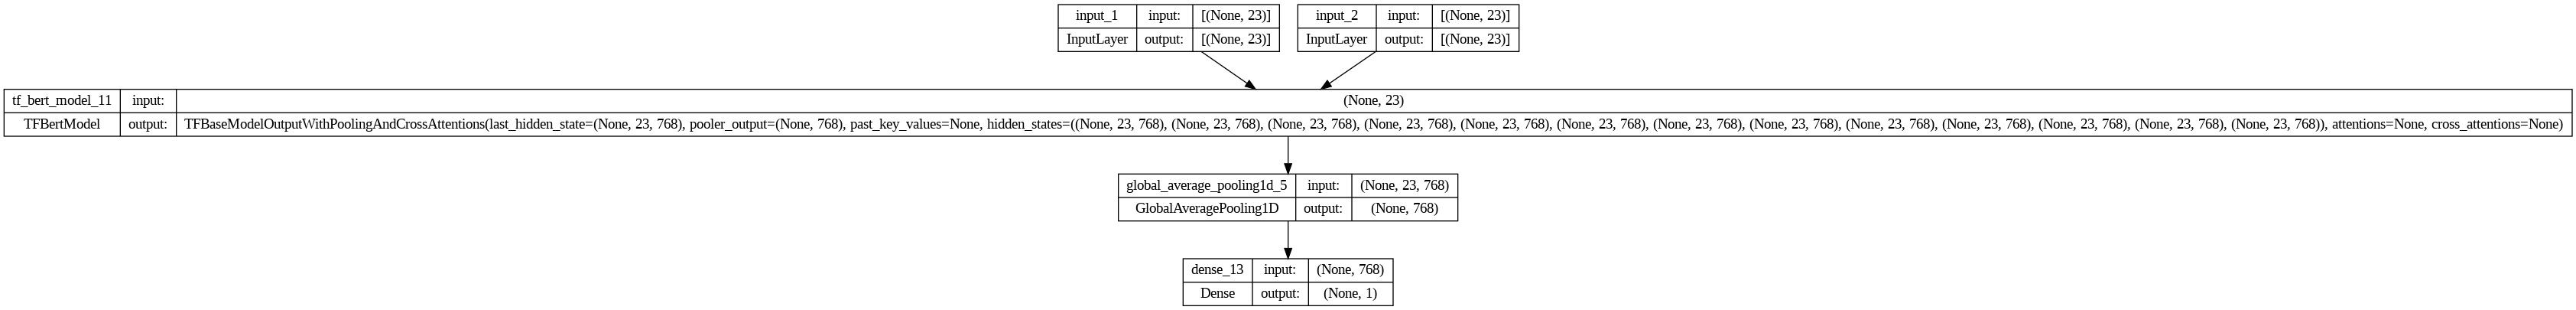

In [90]:
#plot
plot_model(model, to_file='model.png', show_shapes=True)


In [80]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
pip install tensorflow transformers pandas numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/3


2/2 [==============================] - 60s 12s/step - loss: 0.7349 - accuracy: 0.4516 - val_loss: 0.6385 - val_accuracy: 0.6250
Epoch 2/3
2/2 [==============================] - 13s 8s/step - loss: 0.6518 - accuracy: 0.6452 - val_loss: 0.6761 - val_accuracy: 0.5000
Epoch 3/3
2/2 [==============================] - 12s 7s/step - loss: 0.6143 - accuracy: 0.6774 - val_loss: 0.6759 - val_accuracy: 0.5000
Accuracy: 0.5


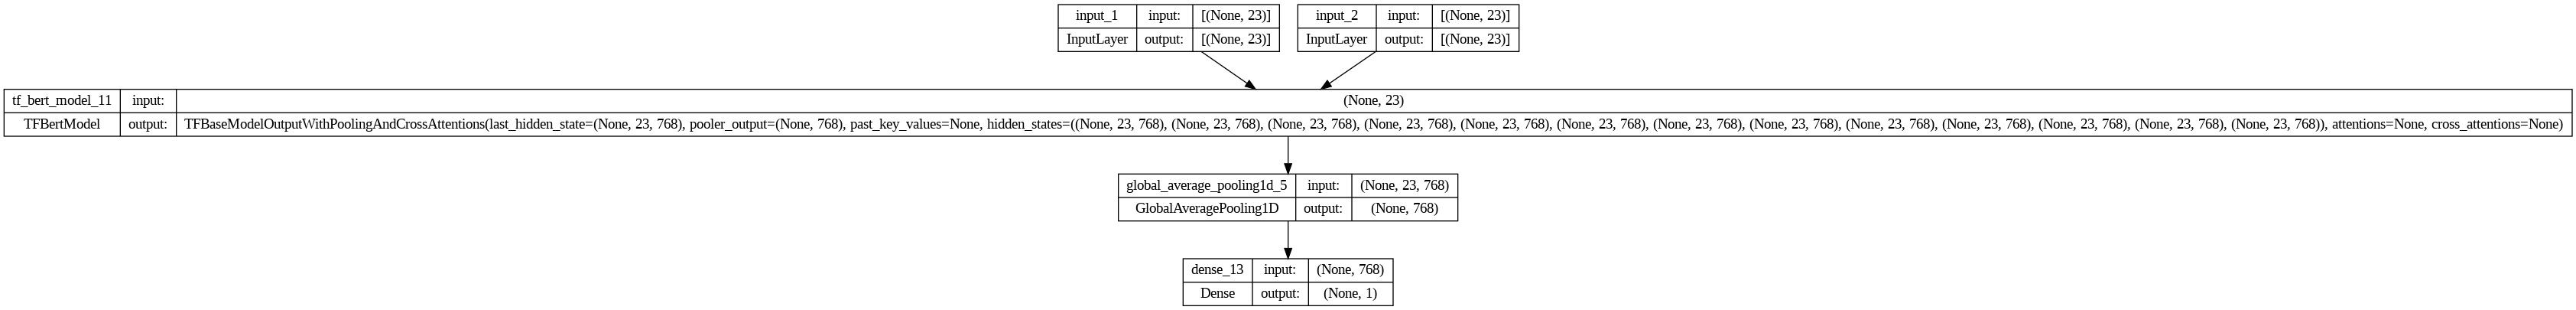

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Load the dataset
data = pd.read_csv('/content/customer_review.csv')
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text and determine the maximum sequence length
X_train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
X_test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)
max_length = max(max(len(x) for x in X_train_encodings['input_ids']), max(len(x) for x in X_test_encodings['input_ids']))

# Re-tokenize with adjusted max_length
X_train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=max_length)
X_test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=max_length)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_1': X_train_encodings['input_ids'],
        'input_2': X_train_encodings['attention_mask'],
    },
    y_train.astype(float)
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_1': X_test_encodings['input_ids'],
        'input_2': X_test_encodings['attention_mask'],
    },
    y_test.astype(float)
))

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)


# Build the transformer-based model
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_1')
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_2')
embedding_layer = bert_model(input_ids, attention_mask=attention_mask)[0]
output_layer = tf.keras.layers.GlobalAveragePooling1D()(embedding_layer)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(output_layer)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output_layer)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_dataset.shuffle(1000).batch(16),
          epochs=3,
          batch_size=16,
          validation_data=test_dataset.shuffle(1000).batch(16))

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset.batch(16), verbose=0)
print("Accuracy:", accuracy)

#plot
plot_model(model, to_file='model.png', show_shapes=True)